### Exercise 4. CT and DT Dynamics 

In [67]:
import numpy as np
from scipy.signal import StateSpace, lsim, dlsim
import matplotlib.pyplot as plt

In [68]:
A = np.array([[0.0, 1.0],[-2.0, -2.0]])
B = np.array([[1.0],[1.0]])
C = np.array([[2.0, 3.0]])
D = np.array([0.0])
x0 = np.array([0.0, 0.0]).reshape(-1,)
   
t = np.linspace(0,5,1000)    
u = np.ones_like(t)  

#Defining the Continuous Control System 
cont_sys = StateSpace(A,B,C,D)
t_ct, yout_ct, xout_ct = lsim(cont_sys, U=u, T=t, X0=x0)
y_at_5 = yout_ct[-1]
print("y(5) =", y_at_5)

#Defining the Discrete System
T=1.0
dt_sys = cont_sys.to_discrete(T)
t_dt, yout_dt, xout_dt = dlsim(dt_sys, u, t,  x0 = [0.,0.])
y_at_5 = yout_dt[-1]
print("y(5) =", y_at_5)

y(5) = -0.032305904694144516
y(5) = [-0.0323059]


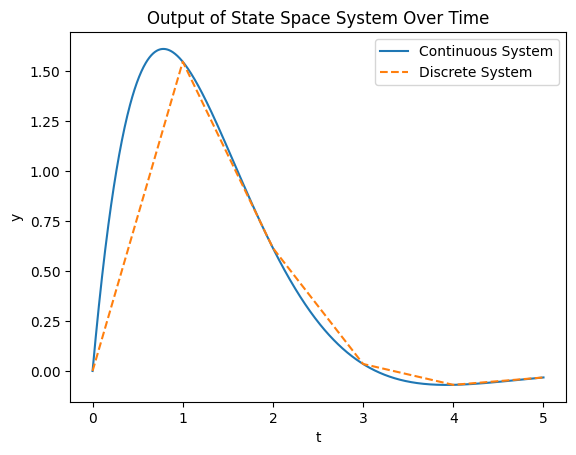

StateSpaceContinuous(
array([[ 0.,  1.],
       [-2., -2.]]),
array([[1.],
       [1.]]),
array([[2., 3.]]),
array([[0.]]),
dt: None
)
StateSpaceDiscrete(
array([[ 0.50832599,  0.30955988],
       [-0.61911975, -0.11079377]]),
array([[ 1.0470709 ],
       [-0.18211414]]),
array([[2., 3.]]),
array([[0.]]),
dt: 1.0
)


In [70]:
#Plotting the fucntions
plt.figure(dpi=100)
plt.plot(t_ct, yout_ct,label="Continuous System")
plt.plot(t_dt, yout_dt, label="Discrete System", linestyle='--')
plt.ylabel('y')
plt.xlabel('t')
plt.title("Output of State Space System Over Time")
plt.legend()
plt.show()

print(cont_sys)
print(dt_sys)